In [ ]:
#Analyze a given time series dataset to identify trends, seasonality, and autocorrelation.

In [ ]:
#The dataset is taken from here: https://www.nseindia.com/get-quotes/equity?symbol=TATAMOTORS

In [ ]:
!pip install yfinance --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 6.3 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load Tata Motors data from Yahoo Finance
ticker = 'TATAMOTORS.NS'
data = yf.download(ticker, start='2018-01-01', end='2023-12-31', interval='1d')
data = data[['Close']]  # We're interested in the 'Close' price for analysis
data.dropna(inplace=True)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,TATAMOTORS.NS
Date,
2018-01-01 00:00:00+00:00,424.450012
2018-01-02 00:00:00+00:00,439.299988
2018-01-03 00:00:00+00:00,433.899994
2018-01-04 00:00:00+00:00,429.950012
2018-01-05 00:00:00+00:00,431.600006


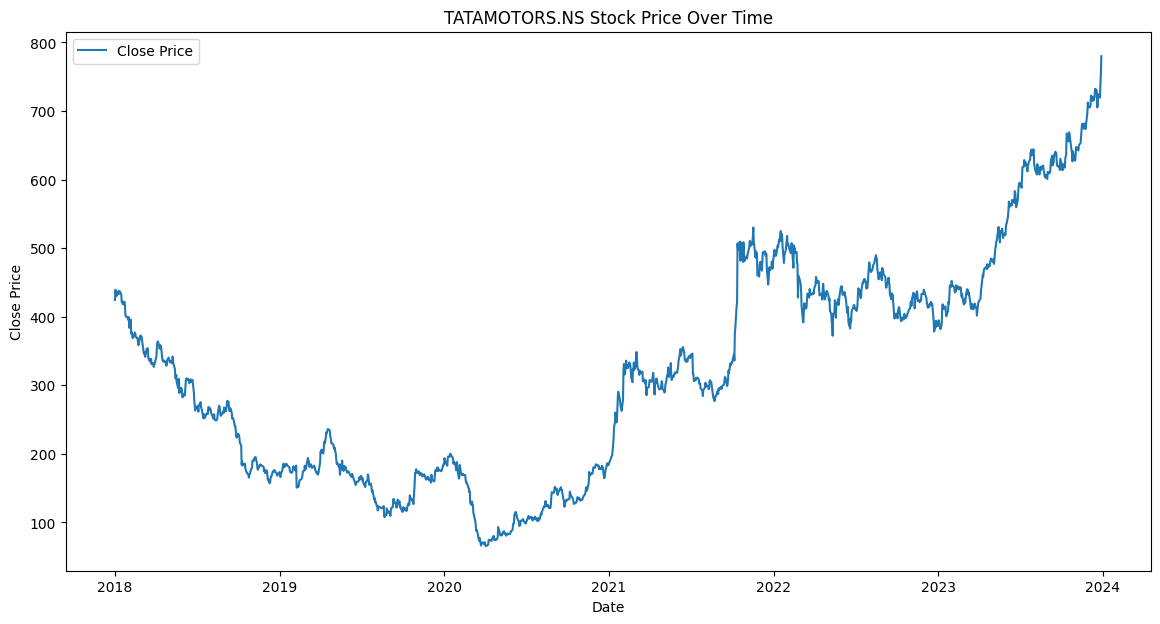

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label="Close Price")
plt.title(f"{ticker} Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

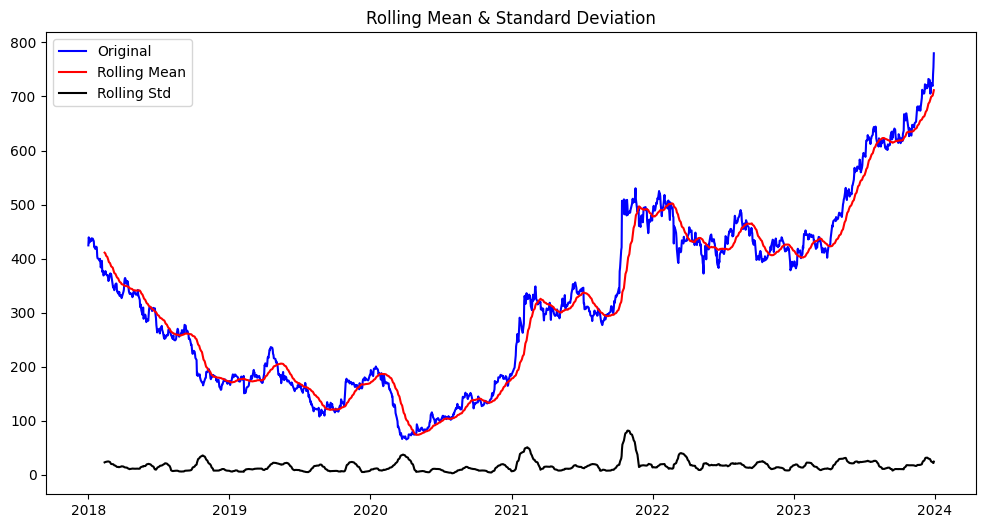

In [ ]:
# Calculate rolling statistics
rolling_mean = data['Close'].rolling(window=30).mean()
rolling_std = data['Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show()


In [ ]:
# Checking for missing values
print("Missing Values:\n", data.isnull().sum())

# Basic statistical metrics
print("\nStatistical Summary:")
print(data.describe())

Missing Values:
 Price  Ticker       
Close  TATAMOTORS.NS    0
dtype: int64

Statistical Summary:
Price          Close
Ticker TATAMOTORS.NS
count    1481.000000
mean      320.185956
std       163.176135
min        65.300003
25%       173.600006
50%       308.799988
75%       435.399994
max       779.950012


In [ ]:
mean = data['Close'].mean()
std_dev = data['Close'].std()
variance = data['Close'].var()

print(f"\nMean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")


Mean: Ticker
TATAMOTORS.NS    320.185956
dtype: float64
Standard Deviation: Ticker
TATAMOTORS.NS    163.176135
dtype: float64
Variance: Ticker
TATAMOTORS.NS    26626.451058
dtype: float64


In [ ]:
scaler = StandardScaler()
data['Scaled_Close'] = scaler.fit_transform(data[['Close']])

<Figure size 1200x600 with 0 Axes>

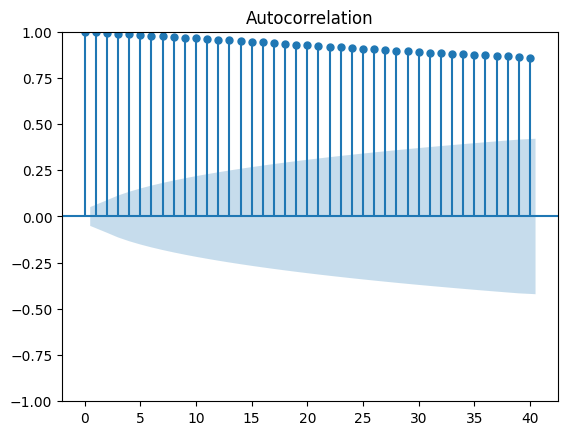

<Figure size 1200x600 with 0 Axes>

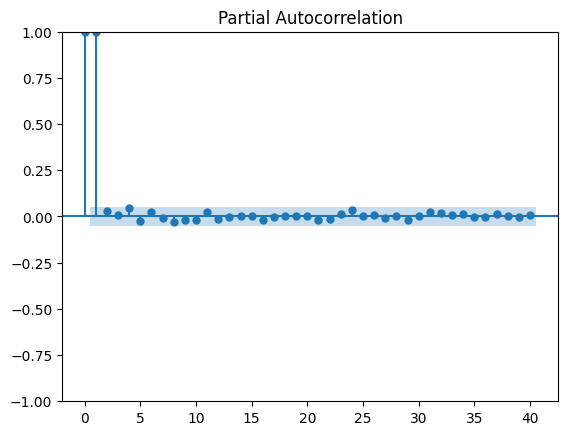

In [ ]:
plt.figure(figsize=(12, 6))
plot_acf(data['Close'], lags=40)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['Close'], lags=40)
plt.show()

In [ ]:
# Fit ARIMA model - adjust (p, d, q) based on ACF/PACF analysis
model = ARIMA(data['Close'], order=(1, 1, 1))
arima_model = model.fit()

# Print model summary
print(arima_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                               SARIMAX Results                                
Dep. Variable:          TATAMOTORS.NS   No. Observations:                 1481
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5189.950
Date:                Tue, 29 Oct 2024   AIC                          10385.900
Time:                        14:47:01   BIC                          10401.800
Sample:                             0   HQIC                         10391.828
                               - 1481                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0025      8.101     -0.000      1.000     -15.880      15.875
ma.L1          0.0002      8.099    2.2e-05      1.000     -15.874      15.874
sigma2        65.0811      1.115     58.378      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


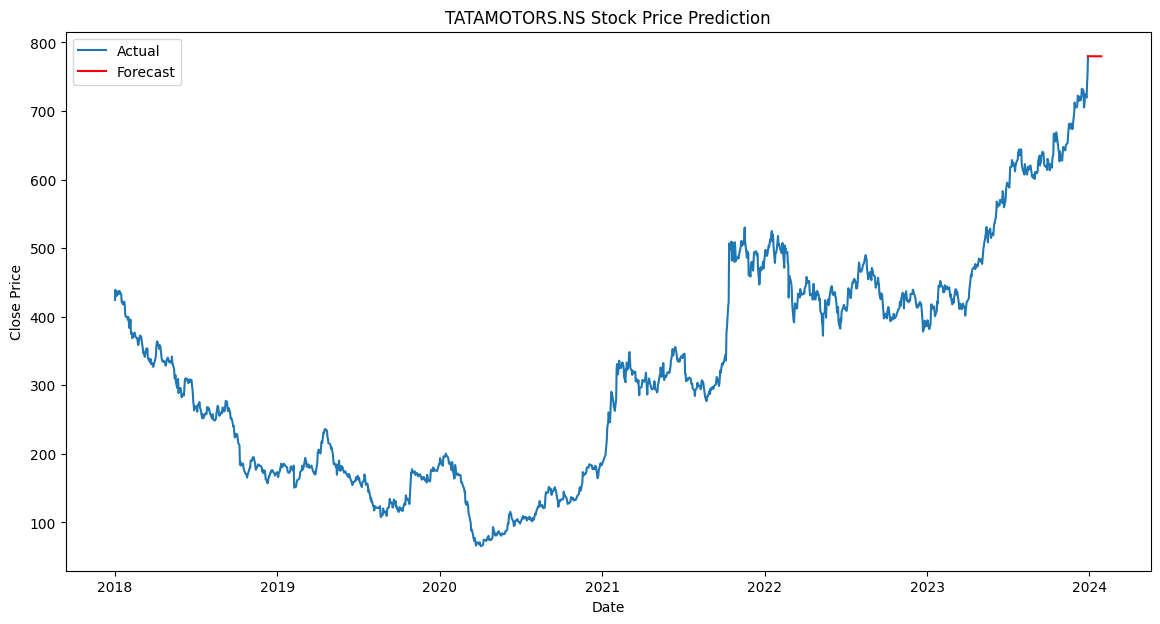

In [ ]:
# Forecast future values
forecast = arima_model.predict(start=len(data), end=len(data) + 30, typ='levels')
forecast.index = pd.date_range(start=data.index[-1], periods=31, freq='D')

# Plot forecast vs actual
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label="Actual")
plt.plot(forecast, label="Forecast", color='red')
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and MSE
mae = mean_absolute_error(data['Close'].iloc[-30:], forecast[:30])
mse = mean_squared_error(data['Close'].iloc[-30:], forecast[:30])

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 68.24278833151887
Mean Squared Error (MSE): 5223.535512778313


In [1]:
#Made By- Momin Nashra Tanveer Ahmed